# Fuzzy Logics

In this notebook, we will be exploring the usability of the Python library 'skfuzzy'. 

In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [17]:
# Input variables
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')

# Membership functions
temperature['low'] = fuzz.trimf(temperature.universe, [0, 25, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [25, 50, 75])
temperature['high'] = fuzz.trimf(temperature.universe, [50, 75, 100])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 25, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [25, 50, 75])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 75, 100])

In [18]:
# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership function
fan_speed['slow'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['fast'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])

In [19]:
# Rules
rule1 = ctrl.Rule(temperature['low'] | humidity['low'], fan_speed['slow'])
rule2 = ctrl.Rule(temperature['medium'] | humidity['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['high'] | humidity['high'], fan_speed['fast'])

# Control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_speed_ctrl = ctrl.ControlSystemSimulation(fan_ctrl)

Fan Speed: 51.530612244898016


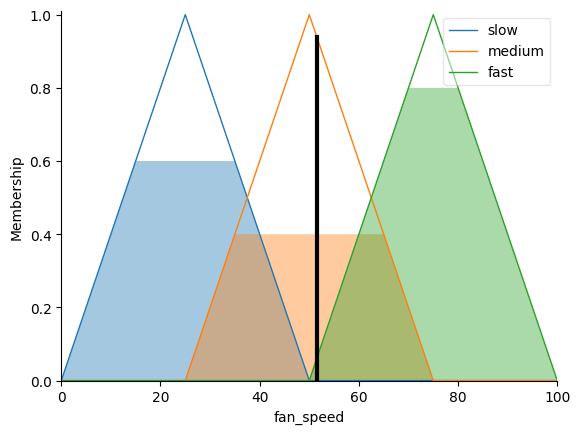

In [20]:
# Input values
fan_speed_ctrl.input['temperature'] = 35
fan_speed_ctrl.input['humidity'] = 70

# Compute the fuzzy output
fan_speed_ctrl.compute()

# Print the output
print("Fan Speed:", fan_speed_ctrl.output['fan_speed'])

# Plot the fuzzy output
fan_speed.view(sim=fan_speed_ctrl)